In [28]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [29]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


9


<Figure size 640x480 with 0 Axes>

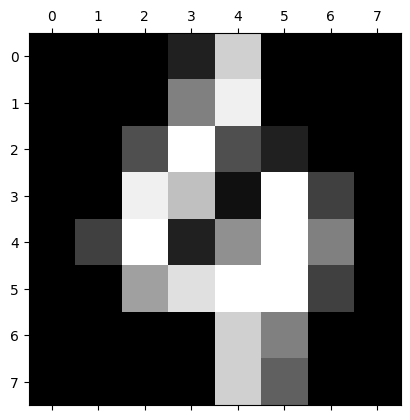

4


In [30]:
print(np.max(digits.target))

plt.gray()
plt.matshow(digits.images[100])
plt.show()

# Looks like a 4. Let's check in target data
print(digits.target[100])

In [31]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, random_state=42)
# The random_state will ensure that every time you run your code, the model is built in the same way. 
# This can be any number. We used random_state = 42.

model.fit(digits.data)

c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

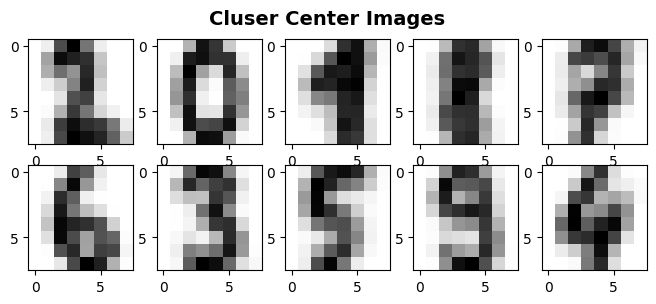

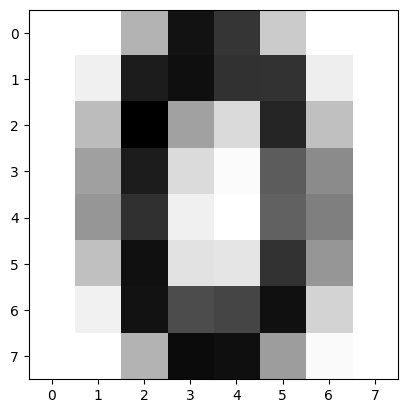

In [32]:
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')

# The cluster centers should be a list with 64 values (0-16). 
# Here, we are making each of the cluster centers into an 8x8 2D array.
for i in range(10):

    # Initialise subplots in a grid of 2x5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)

    # Display images
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()
plt.imshow(model.cluster_centers_[1].reshape((8, 8)), cmap=plt.cm.binary)

In [33]:
new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.76,6.56,1.37,0.00,0.00,0.00,0.00,0.00,1.53,7.62,2.29,0.00,0.00,0.00,0.00,0.00,1.52,7.62,2.29,0.00,0.00,0.00,0.00,0.00,1.52,7.62,2.29,0.00,0.00,0.00,0.00,0.00,1.53,7.62,2.29,0.00,0.00,0.00,0.00,0.00,0.92,7.40,1.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.23,4.42,7.24,6.79,1.45,0.00,0.00,0.00,5.49,7.55,4.80,7.24,5.03,0.00,0.00,0.00,3.58,2.44,0.00,5.49,6.10,0.00,0.00,0.00,0.00,0.00,0.08,6.25,5.95,0.00,0.00,0.00,0.00,0.38,5.03,7.62,2.67,0.00,0.00,0.00,0.00,5.64,7.62,6.86,3.66,2.29,1.37,0.00,0.08,5.64,6.10,6.48,7.62,7.62,5.79,0.00,0.00,0.00,0.00,0.00,0.46,0.76,0.30],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.06,5.87,5.95,2.74,0.00,0.00,0.00,0.00,2.13,6.02,6.56,7.24,0.00,0.00,0.00,0.00,0.00,0.61,6.25,6.71,0.00,0.00,0.00,0.00,0.00,3.36,7.62,7.17,1.52,0.00,0.00,0.00,0.00,0.08,1.68,7.09,5.03,0.00,0.00,0.00,0.00,2.44,4.80,7.55,4.80,0.00,0.00,0.00,0.00,4.80,6.71,4.73,0.69,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.51,3.13,0.00,0.00,0.00,0.00,0.00,0.69,7.55,4.58,4.42,5.95,0.00,0.00,0.00,3.58,7.62,1.22,4.57,6.87,0.15,0.76,0.00,5.34,7.62,6.86,7.32,7.62,7.62,7.62,0.00,1.91,3.81,3.81,6.41,6.79,3.05,2.82,0.00,0.00,0.00,0.00,1.45,1.68,0.00,0.00]
])

new_labels = model.predict(new_samples)

In [34]:
for i in range(len(new_labels)):
    if new_labels[i] == 0:
        print(2, end='')
    elif new_labels[i] == 1:
        print(0, end='')
    elif new_labels[i] == 2:
        print(1, end='')
    elif new_labels[i] == 3:
        print(8, end='')
    elif new_labels[i] == 4:
        print(7, end='')
    elif new_labels[i] == 5:
        print(6, end='')
    elif new_labels[i] == 6:
        print(3, end='')
    elif new_labels[i] == 7:
        print(5, end='')
    elif new_labels[i] == 8:
        print(9, end='')
    elif new_labels[i] == 9:
        print(4, end='')

1754